# SP 500 Market Prediction

#### Author: Richard Flores
#### Date: June 18, 2023

## Initialize libraries and import dataset

In [1]:
# Call Yahoo Finance API to download daily stock and index prices
import yfinance as yf

In [2]:
# Initialize ticker to download price history for a single symbol ie GSPC for SP500
sp500 = yf.Ticker("^GSPC")

In [3]:
# Query historical prices from beginning when index was created
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,4308.319824,4340.129883,4304.370117,4338.930176,3945670000,0.0,0.0
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,0.0,0.0
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-06-05 00:00:00-04:00', '2023-06-06 00:00:00-04:00',
               '2023-06-07 00:00:00-04:00', '2023-06-08 00:00:00-04:00',
               '2023-06-09 00:00:00-04:00', '2023-06-12 00:00:00-04:00',
               '2023-06-13 00:00:00-04:00', '2023-06-14 00:00:00-04:00',
               '2023-06-15 00:00:00-04:00', '2023-06-16 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23980, freq=None)

## Cleaning and visualizing data

<AxesSubplot:xlabel='Date'>

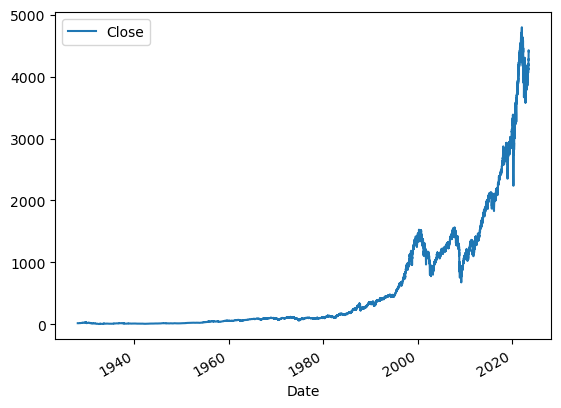

In [6]:
# Graph closing price versus index
sp500.plot.line(y="Close", use_index=True)

In [7]:
# Remove unnecessary columns
del sp500["Dividends"]
del sp500["Stock Splits"]

## Setting up Target for machine learning

In [8]:
# Create tomorrow column and shift closing price by 1 day
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,4308.319824,4340.129883,4304.370117,4338.930176,3945670000,4369.009766
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844


In [10]:
# Setup Target
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,4308.319824,4340.129883,4304.370117,4338.930176,3945670000,4369.009766,1
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844,1


In [12]:
# Remove data before 1990
# Note .copy() prevents pandas copy warning by subsetting dataframe and later assign back to it
sp500 = sp500.loc["1990-01-01":].copy()

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,4308.319824,4340.129883,4304.370117,4338.930176,3945670000,4369.009766,1
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844,1


## Training an initial Machine Learning model

In [14]:
# Import Random Forest Classifier, works great because
# 1. Works by training individual decision trees with randomized parameters and then averaging results
# 2. Resistant to overfitting
# 3. Run quickly
# 4. Pickup non-linear tendencies
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Initialize model and pass in parameters
# n_estimators - number of individual decision trees to train, higher better accuracy
# min_samples_split - protects against overfitting, higher less accurate model but less overfit
# random_state - allows duplicate results for multiple runs
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [16]:
# Split data into train and test set
# Note: cant use cross-validationg with time series or results will look great but not work well real-world
# Reason: You will be using future data to predict the pass resulting in leakage, leaking info into the model
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

In [17]:
# Define Predictors
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [18]:
# Measure Accuracy of Model
from sklearn.metrics import precision_score

# When we said market goes up, did it actually go up? What percentage of the time is this true?
preds = model.predict(test[predictors])

In [19]:
preds

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [20]:
# Change preds to Pandas series
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [21]:
preds

Date
2023-01-25 00:00:00-05:00    0
2023-01-26 00:00:00-05:00    0
2023-01-27 00:00:00-05:00    0
2023-01-30 00:00:00-05:00    0
2023-01-31 00:00:00-05:00    0
                            ..
2023-06-12 00:00:00-04:00    1
2023-06-13 00:00:00-04:00    1
2023-06-14 00:00:00-04:00    1
2023-06-15 00:00:00-04:00    1
2023-06-16 00:00:00-04:00    0
Length: 100, dtype: int32

In [22]:
precision_score(test["Target"], preds)

0.6071428571428571

In [23]:
# Plot Predictions
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

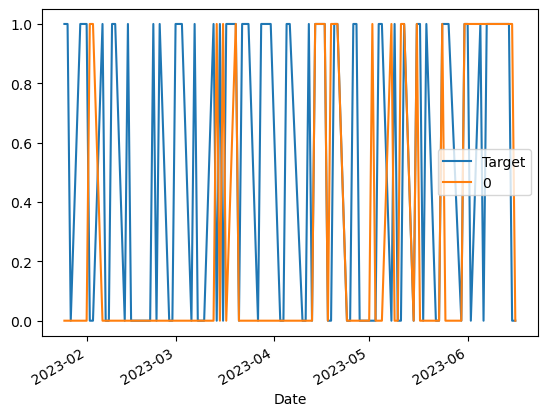

In [24]:
# Plot Orange lines as predictions, and Blue lines as actual value
combined.plot()

## Building a Backtesting System

In [25]:
# Create prediction Function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [26]:
# 2500 ten years of trading days, train model for 10 years and predict for 11th year, train for 11 years predict for 12th, etc
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [27]:
predictions = backtest(sp500, model, predictors)

In [28]:
# Count how many times each prediction was made, 0-down, 1-up
predictions["Predictions"].value_counts()

0    3432
1    2498
Name: Predictions, dtype: int64

In [29]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5296236989591674

In [30]:
# Benchmark - percentage of days market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534064
0    0.465936
Name: Target, dtype: float64

## Adding additional predictors to the model

In [31]:
# Horizons on rolling means
horizons = [2,5,60,250,1000]

In [33]:
new_predictors = []

# Loop through horizons and calculate rolling average
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    
    ratio_column = f"Close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [34]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-12 00:00:00-04:00,4308.319824,4340.129883,4304.370117,4338.930176,3945670000,4369.009766,1,1.004639,2.0,1.009848,4.0,1.051231,34.0,1.090589,118.0,1.150066,534.0
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1,1.003454,2.0,1.012834,4.0,1.056589,35.0,1.097451,119.0,1.157602,535.0
2023-06-14 00:00:00-04:00,4366.290039,4391.819824,4337.850098,4372.589844,4252110000,4425.839844,1,1.000410,2.0,1.008749,5.0,1.055663,35.0,1.097707,119.0,1.158104,536.0


In [35]:
sp500 = sp500.dropna()

In [36]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-09 00:00:00-04:00,4304.879883,4322.620117,4291.700195,4298.859863,3786510000,4338.930176,1,1.000574,2.0,1.003565,3.0,1.043118,34.0,1.081158,117.0,1.139864,533.0
2023-06-12 00:00:00-04:00,4308.319824,4340.129883,4304.370117,4338.930176,3945670000,4369.009766,1,1.004639,2.0,1.009848,4.0,1.051231,34.0,1.090589,118.0,1.150066,534.0
2023-06-13 00:00:00-04:00,4352.609863,4375.370117,4349.310059,4369.009766,4275400000,4372.589844,1,1.003454,2.0,1.012834,4.0,1.056589,35.0,1.097451,119.0,1.157602,535.0


## Improving the Model

In [37]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] =1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
predictions = backtest(sp500, model, new_predictors)

In [40]:
predictions["Predictions"].value_counts()

0.0    4115
1.0     814
Name: Predictions, dtype: int64

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5687960687960688